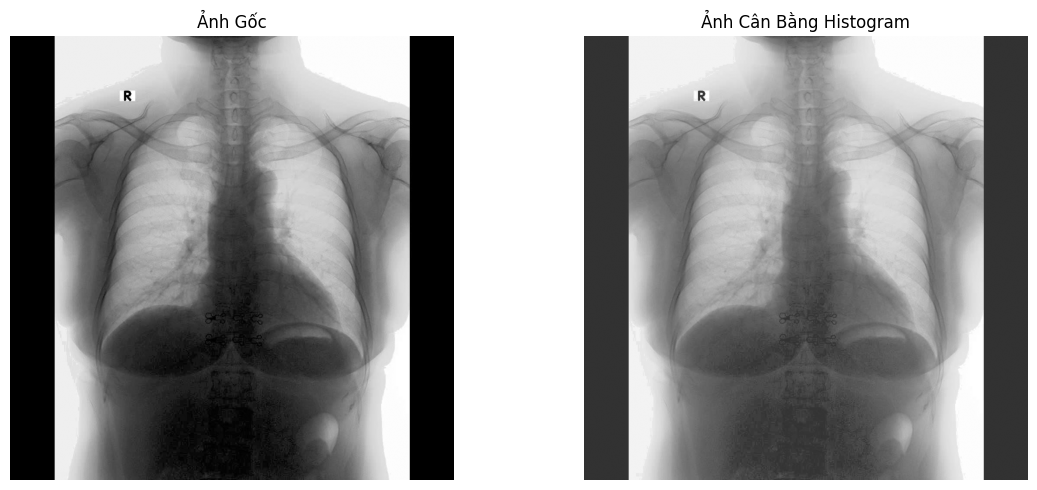

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def tinh_histogram(image_array):
    """Tính histogram (đếm số lượng pixel cho mỗi mức xám từ 0-255)"""
    hist = np.zeros(256, dtype=int)
    # Duyệt qua từng pixel để đếm (flatten giúp chuyển mảng 2D thành 1D)
    for pixel in image_array.flatten():
        hist[pixel] += 1
    return hist

def tinh_cdf(pdf):
    """Tính CDF từ phân bố xác suất (PDF) hoặc histogram"""
    cdf = np.zeros(256, dtype=float)
    cdf[0] = pdf[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + pdf[i]
    return cdf

def main():
    # 1. Đọc ảnh xám
    # Thay 'input_image.jpg' bằng đường dẫn ảnh của bạn
    img_path = 'image.jpg' 
    try:
        img = Image.open(img_path).convert('L') # convert('L') chuyển về ảnh xám
    except FileNotFoundError:
        print(f"Không tìm thấy file {img_path}, vui lòng kiểm tra lại.")
        return

    img_arr = np.array(img)
    total_pixels = img_arr.size

    # 2. Tính histogram
    hist = tinh_histogram(img_arr)

    # 3. Chuẩn hóa histogram -> phân bố xác suất (PDF)
    pdf = hist / total_pixels

    # 4. Tính CDF (Cumulative Distribution Function)
    cdf = tinh_cdf(pdf)

    # 5. Tính mức xám mới theo công thức trong ảnh
    # Công thức: round( (CDF[k] / CDF_max) * 255 )
    # Lưu ý: Vì ta tính CDF từ PDF (đã chia tổng số pixel), nên CDF_max ~ 1.
    # Logic tương đương: round(CDF * 255)
    
    cdf_max = cdf.max() # Giá trị này sẽ xấp xỉ 1
    new_levels = np.round((cdf / cdf_max) * 255).astype(np.uint8)

    # Ánh xạ (Map) các pixel cũ sang giá trị mới
    equalized_img_arr = new_levels[img_arr]

    # Hiển thị kết quả
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Ảnh gốc
    axes[0].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title("Ảnh Gốc")
    axes[0].axis('off')

    # Ảnh sau cân bằng
    axes[1].imshow(equalized_img_arr, cmap='gray', vmin=0, vmax=255)
    axes[1].set_title("Ảnh Cân Bằng Histogram")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()